### Домашняя работа

1. Загрузить файл wines_data.csv
2. Рассчитать и визуализировать корреляции для переменных данного датасета
3. Визуализировать взаимосвязи между 3-4 переменными
4. Рассчитать t-test статистики для 3-4 переменных

In [27]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from numpy import linspace,hstack

import matplotlib
import matplotlib.pyplot as plt


from pylab import plot,show,hist, rcParams 
rcParams['figure.figsize'] = 8, 5


from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats.kde import gaussian_kde

import seaborn as sns
from emoji import emojize

#графики в svg выглядят лучше базовых
%config InlineBackend.figure_format = 'svg' 



#### Data desctiption

1. Alcohol – процентное содержание алкоголя;
2. Malic acid – содержание яблочной кислоты;
3. Alcalinity of ash – содержание щелочи;
4. Magnesium – содержание магния;
5. Total phenols – общее число фенолов;
6. Flavanoids – Флавоноиды;
7. Color intensity – интенсивность цвета;
8. Hue – оттенок вина;
9. OD280/OD315 of diluted wines – разбавленность вина;
10. Proline – сорт вина.

### Решение

##### 1. Загрузить файл wines_data.csv

In [2]:
#загружаем файл wine_data.csv в wine_data
wine_data = pd.read_csv('wine_data.csv', sep=',')

In [3]:
type(wine_data) #посмотрим формат нашего файла

pandas.core.frame.DataFrame

In [4]:
#посмотрим что есть в наших данных (описание признаков приведено выше)
wine_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#проверим наши данные на наличие нулевых значений
wine_data.isnull().sum() 

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
#посмотрим к какому классу относится самое крепкое вино
wine_data.groupby('Class')['Alcohol'].max()

Class
1    14.83
2    13.86
3    14.34
Name: Alcohol, dtype: float64

In [7]:
#посмотрим немного описательной статистики
wine_data.describe(include='all')

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### немного выводов так сказать пяти числовая сводка, если кто-то еще помнит о такой

как видно из приведенных данных в нашей выборке всего 178 обьектов (видимо видов тестового вина) всего выделино 3 класа вина, по крепости вино относится к группе натуральных (крепость 9—16 %) размах вариации по Alcohol незначительный,стоит обратить внимание на аномально - высокое значение признака Malic acid 5.8, который привышает нормальный показатель (от 0 - до 5), еще интересный для исследовния признак оттенок вина (Hue) в выбрке присутствует 25% белого вина а три четвети выборки составляют от розового до красного вина 

##### 2. Рассчитать и визуализировать корреляции для переменных данного датасета

In [8]:
#выполним корреляцию наших признаков
corr = wine_data.corr()
corr

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


#### выводы корреляции
достаточно высокую связь имеют между собой:

- крепость (Alcohol) и интенсивность цвета (Color intensity) 0.546364
- крепость (Alcohol) и сорт вина (Proline) 0.643720

низкую связь имеют:
- содержание яблочной кислоты (Malic acid) и оттенока вина (Hue) -0.561296
- содержание яблочной кислоты (Malic acid) и Флавоноиды (Flavanoids) -0.411007 


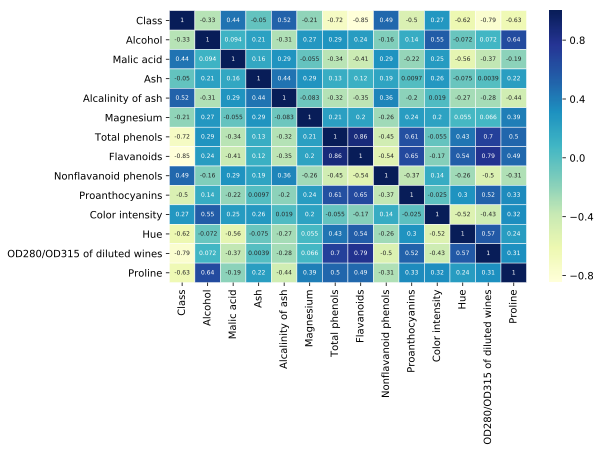

In [28]:
#визуализируем результаты корреляционного анализа

sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu", linecolor='white', annot_kws={"size": 6},\
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

##### 3. Визуализировать взаимосвязи между 3-4 переменными

##### 3.1 Посмотрим на взаимосвязь содержания алкоголя (Alcohol) и интенсивность цвета (Color intensity), так сказать как крепость влияет на глубину цвета вина

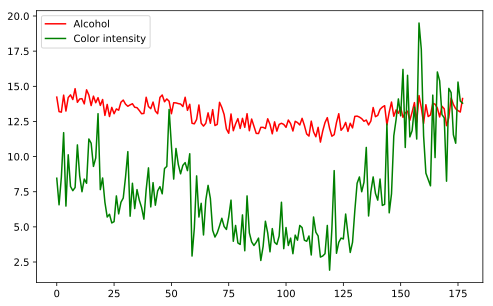

In [29]:
# посмотрим насколько очевидна взаимосвязь между между признаками 
plt.plot(wine_data['Alcohol'], 'r')
plt.plot(wine_data['Color intensity']*1.5, 'g') #масштабирую с помощью домножения значения Alcohol на 0.5
plt.legend();

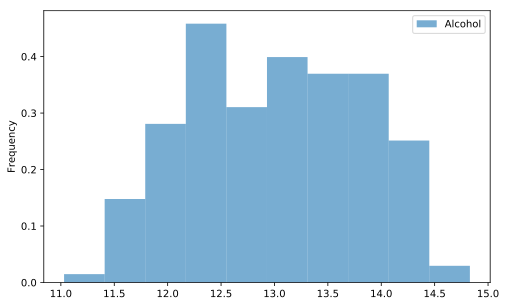

In [30]:
#для лучшего представления построим гистограмму и посмотрим какой тип распределения имеет наш алкоголь 
#будем использовть так называемый вероятностный тип гистограммы
wine_data['Alcohol'].plot.hist(normed=1, alpha=0.6)
plt.legend();

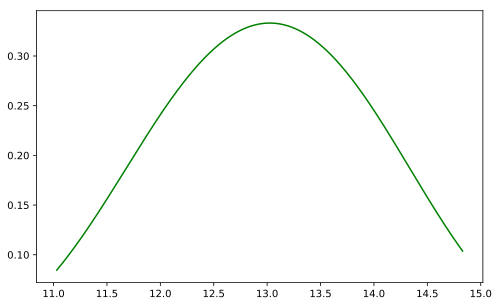

In [31]:
#выполним ядерную оценку плотности 
my_dens_alc = gaussian_kde(wine_data['Alcohol'], bw_method= 1)
x = linspace(min(wine_data['Alcohol']), max(wine_data['Alcohol']), 1000)
plot(x, my_dens_alc(x), 'g')

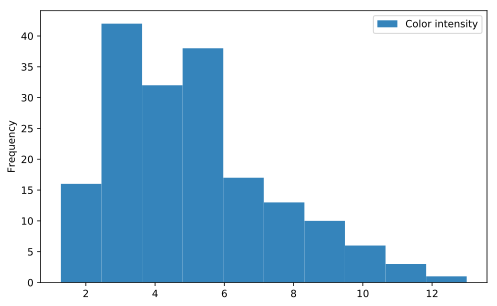

In [32]:
wine_data['Color intensity'].plot.hist(alpha=0.9)
plt.legend();

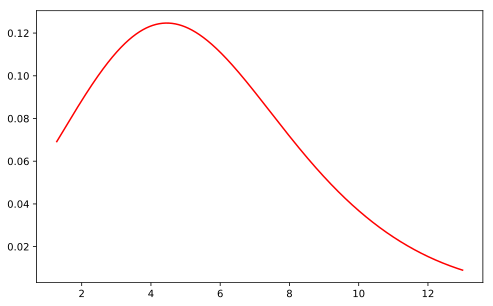

In [33]:
my_dens_col = gaussian_kde(wine_data['Color intensity'], bw_method= 1)
y = linspace(min(wine_data['Color intensity']), max(wine_data['Color intensity']), 1000)
plot(y, my_dens_col(y), 'r')


##### 3.2 Посмотрим на взаимосвязь крепости (Alcohol) и класса вина (Class)

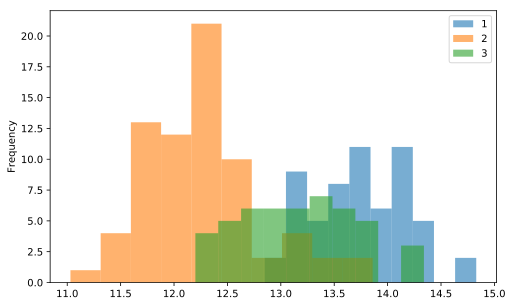

In [34]:
#посмотрим взаимосвязь между крепостью вина и итенсивностью цвета (в зависимости от класса вина)

wine_data.groupby('Class')['Alcohol'].plot.hist(alpha=0.6)
plt.legend();

Text(0.5,0.98,'')

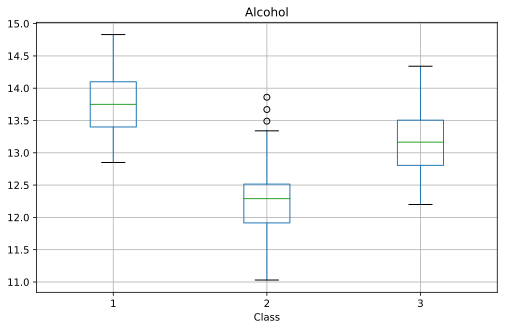

In [35]:
#во втором классе есть несколько вылетов в пределе 3(Q3 - Q1) межквартильного размаха
#распределение в 1 и 3 классах симметричное а во втором смещенно в лево
ax = wine_data.boxplot(column='Alcohol', by='Class')
ax.get_figure().suptitle('')

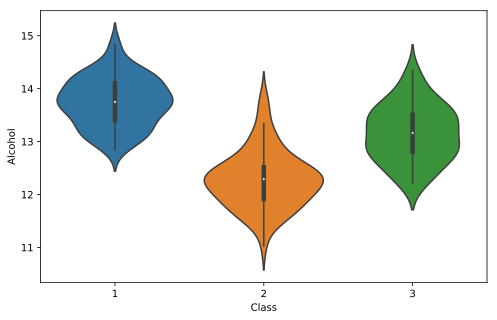

In [36]:

#в 1 и 2 классе ярковыраженное унимодальное распределение, в 3 классе наблюдаются признаки бимодальности

axes = plt.subplots(1, sharey=True, figsize=(8,5))
sns.violinplot(x='Class', y='Alcohol', data=wine_data, ax=axes[1]);

##### 3.3 Посмотрим на взаимосвязь крепости (Alcohol)  и Флавоноиды (Flavanoids)

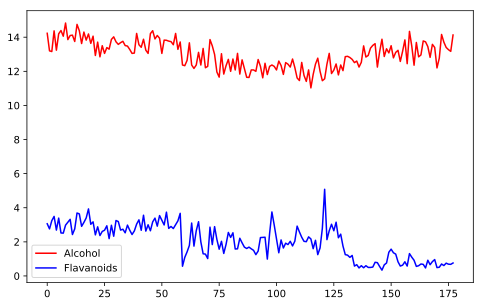

In [37]:
plt.plot(wine_data['Alcohol'], 'r') 
plt.plot(wine_data['Flavanoids'], 'b')
plt.legend();

##### 3.4 Посмотрим на взаимосвязь крепости  вина (Alcohol) и гетероциклической аминокислоты

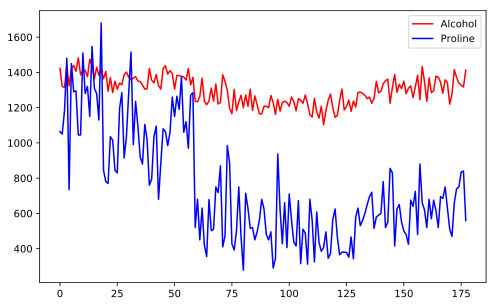

In [38]:
plt.plot(wine_data['Alcohol']*100, 'r') #масштабирую с помощью домножения значения Alcohol на 100
plt.plot(wine_data['Proline'], 'b')
plt.legend();

##### 3.5 Посмотрим на взаимосвязь интенсивность цвета (Color intensity), оттенок вина (Hue) и разбавленность вина (OD280/OD315 of diluted wines)

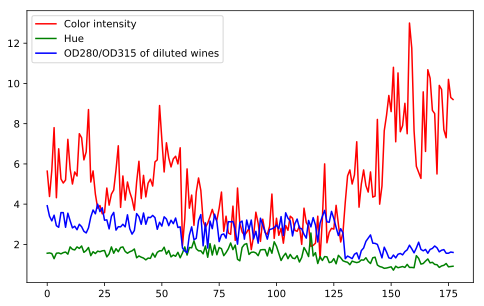

In [39]:
plt.plot(wine_data['Color intensity'], 'r')
plt.plot(wine_data['Hue']*1.5, 'g') #масштабирую с помощью домножения значения Hue на 100
plt.plot(wine_data['OD280/OD315 of diluted wines'], 'b')
plt.legend();

######  кажется мы нашли чемпиона, отлично прослеживается взаимосвязь между Hue и OD280/OD315 of diluted wines

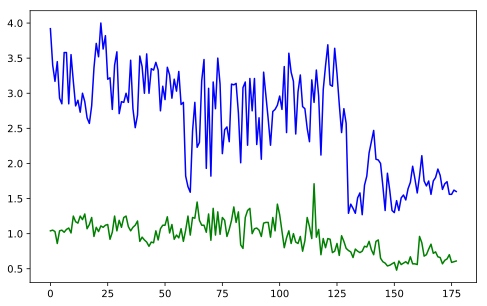

In [40]:
plt.plot(wine_data['Hue'], 'g') 
plt.plot(wine_data['OD280/OD315 of diluted wines'], 'b')


##### 4. Рассчитать t-test статистики для 3-4 переменных

4.1 Проверим гипотизу что ср знач оттенок вина (Hue) и интенсивность цвета (Color intensity) равны

- H0 = ср знач Hue и Color intensity одинаковы по значению
- H1 = ср знач Hue и Color intensity различны по значению

Значение pvalue=3.4178572035256162e-74 стремится к 0, значит у нас есть все основания отвергнуть нулевую гипотезу



In [22]:
stats.ttest_ind(wine_data['Hue'], wine_data['Color intensity'])

Ttest_indResult(statistic=-23.485186398851056, pvalue=3.4178572035256162e-74)

4.2.1 Проверим гипотизу что ср знач процентного содержания алкоголя (Alcohol) с числом (берем среднее 13.00 и минимальное 11.03) равны

- H0 = ср знач Alcohol в нашей выборке составляет 13  
- H1 = ср знач Alcohol в нашей выборке не равно 13

Значение pvalue=0.9919083221024861 очень близко к 1 значит у нас не достаточно оснований чтобы отвергнуть нулевую гипотезу


In [23]:
stats.ttest_1samp(wine_data['Alcohol'], 13.00)

Ttest_1sampResult(statistic=0.01015592394800969, pvalue=0.9919083221024861)

4.2.2 Проверим гипотизу что ср знач процентного содержания алкоголя (Alcohol) с числом (берем среднее 13.00 и минимальное 11.03) равны

- H0 = ср знач Alcohol в нашей выборке равно 11.03 
- H1 = ср знач Alcohol в нашей выборке не равно 11.03 

Значение pvalue=2.6968678945352247e-76 очень низкое, значит у нас есть все основания отвергнуть нулевую гипотезу


In [24]:
stats.ttest_1samp(wine_data['Alcohol'], 11.03)

Ttest_1sampResult(statistic=32.38539493854062, pvalue=2.6968678945352247e-76)

4.3 Проверим гипотизу что ср знач разбавленностb вина (OD280/OD315 of diluted wines) и интенсивность цвета вина (Color intensity) равны

- H0 = ср знач OD280/OD315 of diluted wines и Color intensity равны 
- H1 = ср знач OD280/OD315 of diluted wines и Color intensity не равны 

Значение pvalue=1.2112200845382484e-33 очень маленькое, значит у нас есть все основания отвергнуть нулевую гипотезу

In [25]:
stats.ttest_ind(wine_data['OD280/OD315 of diluted wines'], wine_data['Color intensity'])

Ttest_indResult(statistic=-13.461817006745923, pvalue=1.2112200845382484e-33)

In [41]:
emojize(':thumbs_up:')

'👍'